In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

In [2]:
# Study data files
# We create the paths for our files
study_results_path = "Resources/Study_results.csv"
mouse_metadata_path = "Resources/Mouse_metadata.csv"

In [3]:
# Read the mouse data and the study results
# We open them as csv files and use the head funtion to see the the dataframe of both dataframes
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
# We use merge to create new dataframe, since there is information not on both df, we use the outer merge. 
# We merge them on Mouse ID
mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
# We use nunique to find the number of unique mice. 
total_mice = mouse_merge['Mouse ID'].nunique()
total_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# To find the duplicate, we use the duplicate function and we specify the columns in which the mouse repeats. 
drop_duplicates = mouse_merge[mouse_merge.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
drop_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# To create a new dataframe we use loc and the condition != to drop that mouse id. 
clean_mouse = mouse_merge.loc[mouse_merge["Mouse ID"] != "g989"]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
# We check again the number of mice to see if we were succesful. 
mice_clean = clean_mouse['Mouse ID'].nunique()
mice_clean

248

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# First we group the dataframe so we have the table grouped by regimen
group_regimen = clean_mouse.groupby('Drug Regimen')

In [11]:
# We create the dataframe with the mean, median, std and sem and give it the appropriate format. 
mean = group_regimen['Tumor Volume (mm3)'].mean()
median = group_regimen['Tumor Volume (mm3)'].median()
standard_dev = group_regimen['Tumor Volume (mm3)'].std()
sem = group_regimen['Tumor Volume (mm3)'].sem()
statistical_summary = pd.concat([mean, median, standard_dev, sem], axis=1)
statistical_summary.columns=["Mean", "Median", "Standard Deviation", "SEM"]
statistical_summary["Mean"] = statistical_summary["Mean"].astype(float).map(
    "{:,.2f}".format)
statistical_summary["Median"] = statistical_summary["Median"].astype(float).map(
    "{:,.2f}".format)
statistical_summary["Standard Deviation"] = statistical_summary["Standard Deviation"].astype(float).map(
    "{:,.2f}".format)
statistical_summary["SEM"] = statistical_summary["SEM"].astype(float).map(
    "{:,.2f}".format)
statistical_summary

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.45,6.62,0.54
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [41]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem']})
agg_summary

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

In [13]:
group_regimen.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# To create the bar plot, we need to specify the x axis. 
mouse_count = group_regimen['Mouse ID'].count()

<AxesSubplot:title={'center':'Drug Regimen Measurment'}, xlabel='Drug Regimen', ylabel='Mice count'>

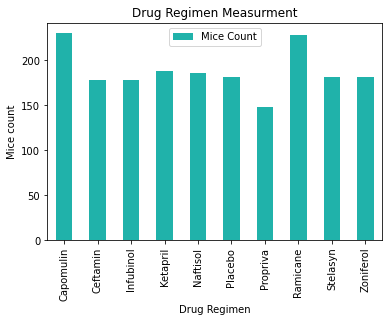

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_pandas = mouse_count.plot.bar(x= 'Drug Regimen', y='Mouse ID', title='Drug Regimen Measurment',
                                  xlabel= 'Drug Regimen', ylabel='Mice count', color='lightseagreen', legend=True)
bar_pandas.legend(['Mice Count'], loc='best')

bar_pandas

In [16]:
 # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Once again, we create the x axis
drug_names = sorted(clean_mouse['Drug Regimen'].unique())

Text(0, 0.5, 'Mice count')

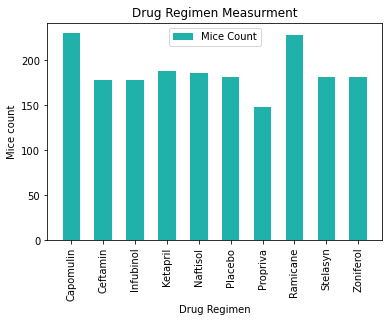

In [107]:
#To generate the plot, we create the axis and give it the same format as the previous bar plot. 
x_axis = np.arange(len(group_regimen['Drug Regimen']))
plt.bar(x_axis, mouse_count,0.55, color="lightseagreen", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation = 90)
plt.legend(['Mice Count'], loc='upper center')
plt.title("Drug Regimen Measurment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice count")


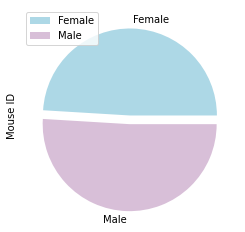

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# We repeat the process of specifying the axis and use plot for pandas. 
sex_group = clean_mouse.groupby('Sex').count()
pie_bar = sex_group.plot(kind='pie', y='Mouse ID', colors = ['lightblue', 'thistle'], explode=[0,0.1])
pie_bar.legend(loc='upper left')


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# We generate the axis once again. 
sex_group

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [20]:
labels = sorted(clean_mouse['Sex'].unique())
labels

['Female', 'Male']

In [115]:
# We create the specifications for the pie chart. 
mouse_sex = sex_group['Mouse ID'].count()
colors = ["lightblue", "thistle"]
explode = (0,0.1)
mouse_sex = sex_group['Mouse ID']

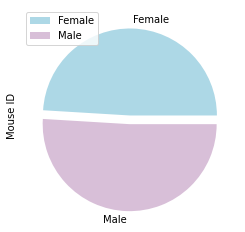

In [116]:
# We use the function plt.pie and use the previous specifications. 
plt.pie(mouse_sex, explode=explode, labels=labels, colors=colors, 
        shadow=False, startangle=360, counterclock=True)
plt.ylabel("Mouse ID")
plt.legend(['Female', 'Male'], loc='upper left')

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [24]:
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Start by getting the last (greatest) timepoint for each mouse
latest_entry = clean_mouse.groupby(["Mouse ID"])["Timepoint"].max()
latest_entry.reset_index()

,Mouse ID,Timepoint
0,a203,45.0
1,a251,45.0
2,a262,45.0
3,a275,45.0
4,a366,30.0
...,...,...
243,z435,10.0
244,z578,45.0
245,z581,45.0
246,z795,45.0


In [35]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge = pd.merge(clean_mouse, latest_entry, on=["Mouse ID", "Timepoint"], how="right")
new_merge.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45.0,67.973419,2
1,a251,Infubinol,Female,21,25,45.0,65.525743,1
2,a262,Placebo,Female,17,29,45.0,70.717621,4
3,a275,Ceftamin,Female,20,28,45.0,62.999356,3
4,a366,Stelasyn,Female,16,29,30.0,63.440686,1
5,a401,Zoniferol,Female,8,25,45.0,66.794156,4
6,a411,Ramicane,Male,3,22,45.0,38.407618,1
7,a444,Ramicane,Female,10,25,45.0,43.047543,0
8,a457,Ketapril,Female,11,30,10.0,49.783419,0
9,a492,Stelasyn,Male,20,25,45.0,60.122011,1


In [37]:
new_merge["Mouse ID"].nunique()

248

In [38]:
new_merge.count()

Mouse ID              248
Drug Regimen          248
Sex                   248
Age_months            248
Weight (g)            248
Timepoint             248
Tumor Volume (mm3)    248
Metastatic Sites      248
dtype: int64

In [59]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for x in treatments:
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_series = new_merge.loc[new_merge["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    # add subset 
    tumor_data.append(tumor_series)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    tumor_series.loc[(tumor_series < lower_bound) | (tumor_series > upper_bound)]
    print(tumor_series.loc[tumor_series < lower_bound | (tumor_series > upper_bound)])

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
quartiles = tumor_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

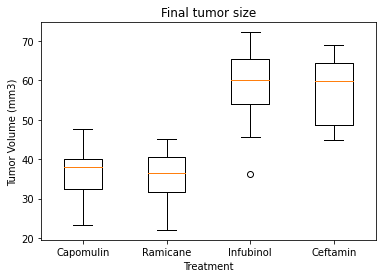

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumor_data)
ax.set_xticklabels(treatments)
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final tumor size")

plt.show()

In [42]:
#  Line and Scatter Plots 
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# First we need to loc the specific drug we need, Capomulin
capomulin = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"] 
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0.0,45.000000,0
11,s185,Capomulin,Female,3,17,5.0,43.878496,0
12,s185,Capomulin,Female,3,17,10.0,37.614948,0
13,s185,Capomulin,Female,3,17,15.0,38.177232,0
14,s185,Capomulin,Female,3,17,20.0,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45.0,47.685963,1
1452,r157,Capomulin,Male,22,25,0.0,45.000000,0
1453,r157,Capomulin,Male,22,25,5.0,45.597064,0
1454,r157,Capomulin,Male,22,25,10.0,46.059608,0


In [43]:
#Once we have the drug, we must choose a mouse. To make it easy we chose the first one. 
capomulin_mouse = capomulin.loc[capomulin['Mouse ID'] == "s185"]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0.0,45.000000,0
11,s185,Capomulin,Female,3,17,5.0,43.878496,0
12,s185,Capomulin,Female,3,17,10.0,37.614948,0
13,s185,Capomulin,Female,3,17,15.0,38.177232,0
14,s185,Capomulin,Female,3,17,20.0,36.866876,0
15,s185,Capomulin,Female,3,17,25.0,33.949940,0
16,s185,Capomulin,Female,3,17,30.0,32.959671,1
17,s185,Capomulin,Female,3,17,35.0,28.328531,1
18,s185,Capomulin,Female,3,17,40.0,25.472143,1
19,s185,Capomulin,Female,3,17,45.0,23.343598,1


In [44]:
# We create the x and y axis. 
timepoint_cap = capomulin_mouse["Timepoint"]
tumor_cap = capomulin_mouse["Tumor Volume (mm3)"]

Text(0, 0.5, 'Tumor Volume (mm3)')

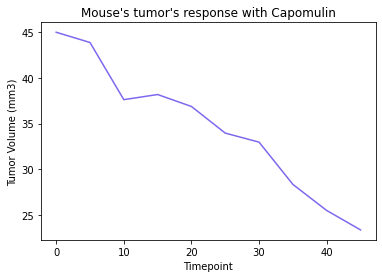

In [102]:
# We generate the line plot and give it an appropiate format. 
plt.plot(timepoint_cap, tumor_cap, color="mediumslateblue" )
plt.title("Mouse's tumor's response with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# In order to generate a scatter plot, first we need to define the axis.
# To define the axis we need to group the dataframe by mouse and then obtain the mean of the weight and volume
mean_cap = capomulin.groupby("Mouse ID").mean()
mean_cap

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


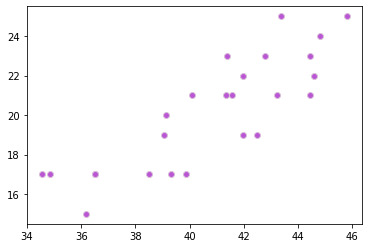

In [111]:
plt.scatter(mean_cap["Tumor Volume (mm3)"], mean_cap["Weight (g)"], marker="o", facecolors="mediumorchid", edgecolors="thistle")

In [71]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(mean_cap["Tumor Volume (mm3)"], mean_cap["Weight (g)"])
vc_fit = vc_slope * mean_cap["Tumor Volume (mm3)"] + vc_int

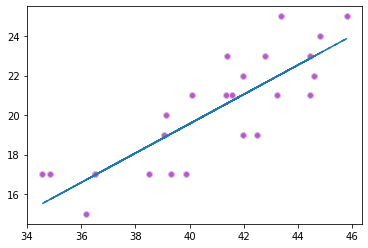

In [112]:
plt.scatter(mean_cap["Tumor Volume (mm3)"], mean_cap["Weight (g)"], marker="o", facecolors="mediumorchid", edgecolors="thistle")
plt.plot(mean_cap["Tumor Volume (mm3)"],vc_fit,"--")

In [80]:
cor_volume = mean_cap["Tumor Volume (mm3)"]
cor_weight = mean_cap["Weight (g)"]
print(f"The correlation coefficient between Tumor Volume (mm3) and Weight (g) is {round(st.pearsonr(cor_volume, cor_weight)[0],2)}") 

The correlation coefficient between Tumor Volume (mm3) and Weight (g) is 0.84
